In [1]:
import sys
sys.path.append('../source/')
import numpy as np
from Users import Users
from Producers import *
from sklearn.preprocessing import normalize
from plotting import *
from tqdm import tqdm
import pandas as pd

In [2]:
plt.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'font.size' : 15,                   # Set font size to 11pt
    'axes.labelsize': 15,               # -> axis labels
    'xtick.labelsize':12,
    'ytick.labelsize':12,
    'legend.fontsize': 12,
    'lines.linewidth':2,
    'text.usetex': False,
    'pgf.rcfonts': False,
})

In [3]:
utils = ['avg_prod_util', 'avg_user_util']

In [4]:
nprodlist = [5,10,50]

In [5]:
def df_agg_utils(df, temp:int): # also in src/plotting.py
  '''
    average across seeds

    Returns 
    df_agg has columns: dimension, nprod, avg_prod_util_mean, avg_prod_util_sem, avg_user_util_mean, avg_user_util_sem
  '''
  groups = ['dimension', 'nprod'] # groupby columns, averages out across seeds
  cols = groups + ['avg_prod_util', 'avg_user_util']
  df = df[df['NE_exists'] == True][cols]
  df_agg = df.groupby(groups).agg(['mean', 'sem']) # iters_to_NE will get mean, standard error of mean; we group by dimensions, num_prod
  df_agg.columns = df_agg.columns.map("_".join) # this is just to flatten multi column iters_to_NE mean and SEM
  df_agg.reset_index(inplace=True)
  df_agg['temp'] = temp # add a column for temperatur
  return df_agg

In [6]:
# df_linear_agg = df_agg_utils(df_linear, temp =1.0)
# df_linear_agg[(df_linear_agg['dimension'] == 5)  & (df_linear_agg['nprod'] == 100)]

## Amzn music

In [7]:
df_100 = pd.read_pickle("../saved_frames/amznmusic_softmax_temp_100.0/concseeds5.pkl")
df_10 = pd.read_pickle("../saved_frames/amznmusic_softmax_temp_10.0/concseeds5.pkl")
df_1 = pd.read_pickle("../saved_frames/amznmusic_softmax_temp_1.0/concseeds5.pkl")
df_01 = pd.read_pickle("../saved_frames/amznmusic_softmax_temp_0.1/concseeds5.pkl")
df_001 = pd.read_pickle("../saved_frames/amznmusic_softmax_temp_0.01/concseeds5.pkl")
df_linear = pd.read_pickle("../saved_frames/amznmusic_linear_temp_1.0/concseeds5.pkl")

(df_001['NE_exists'] == False).sum(), (df_01['NE_exists'] == False).sum(), \
(df_1['NE_exists']==False).sum(), (df_10['NE_exists']==False).sum(), \
(df_100['NE_exists']==False).sum(), (df_linear['NE_exists']==False).sum()

(4, 0, 0, 0, 0, 0)

In [8]:
dict_df = {}
dict_df[100] = df_100
dict_df[10] = df_10
dict_df[1] = df_1
dict_df[0.1] = df_01
dict_df[0.01] = df_001

/Users/krishna/Documents/Research/StrategicML/RecSys/recsys-code/recsys_eq/notebooks/../source/plotting.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by = 'temp', inplace = True)


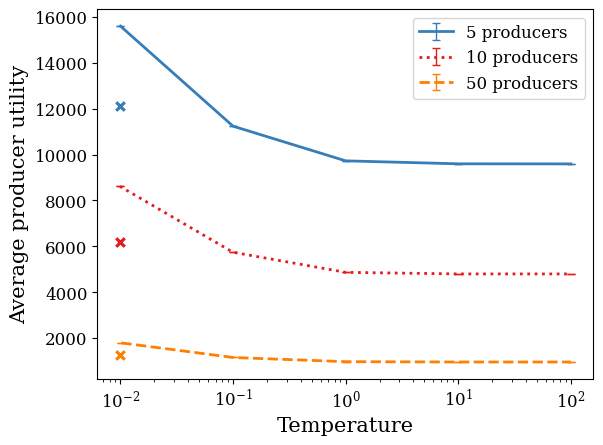

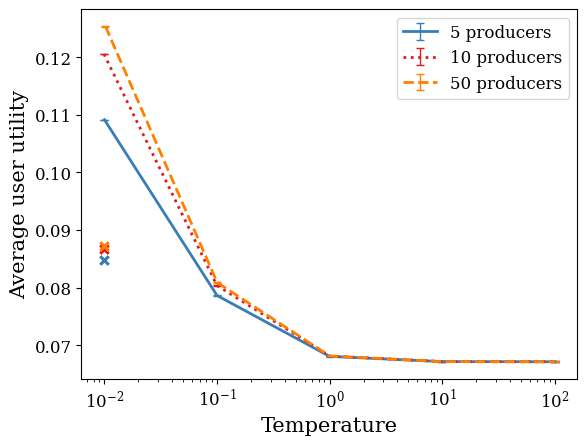

In [9]:
plot_utils_tempvar_prodcurves__errbar(dict_df, df_linear, nprodlist, '../plots/util-temps-nprodcurves/amznmusic_')

/Users/krishna/Documents/Research/StrategicML/RecSys/recsys-code/recsys_eq/notebooks/../source/plotting.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by = 'temp', inplace = True)


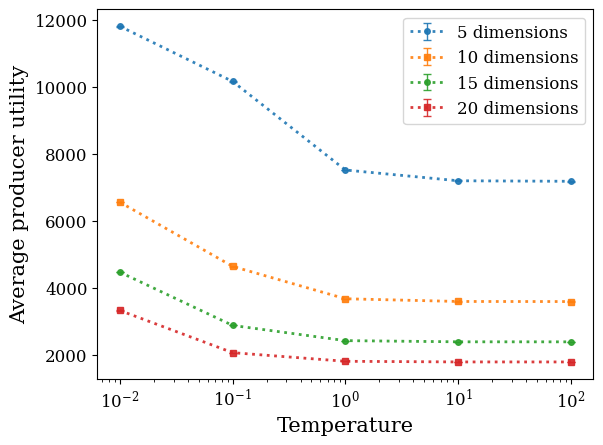

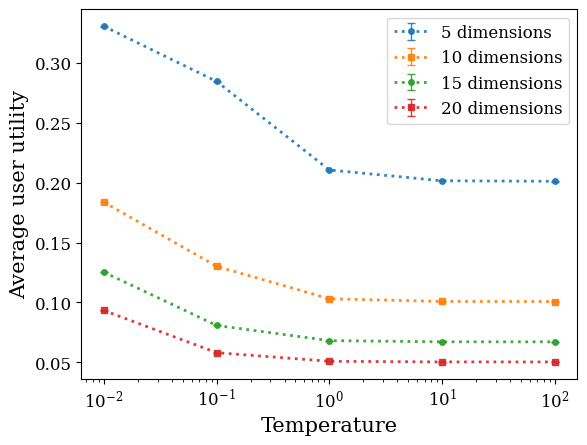

In [10]:
plot_utils_tempvar_dimcurves__errbar(dict_df, '../plots/util-temps-ndimcurves/amznmusic_')

## Rentrunway

In [11]:
df_100 = pd.read_pickle("../saved_frames/rentrunway_softmax_temp_100.0/concseeds5.pkl")
df_10 = pd.read_pickle("../saved_frames/rentrunway_softmax_temp_10.0/concseeds5.pkl")
df_1 = pd.read_pickle("../saved_frames/rentrunway_softmax_temp_1.0/concseeds5.pkl")
df_01 = pd.read_pickle("../saved_frames/rentrunway_softmax_temp_0.1/concseeds5.pkl")
df_001 = pd.read_pickle("../saved_frames/rentrunway_softmax_temp_0.01/concseeds5.pkl")
df_linear = pd.read_pickle("../saved_frames/rentrunway_linear_temp_1.0/concseeds5.pkl")

(df_001['NE_exists'] == False).sum(), (df_01['NE_exists'] == False).sum(), \
(df_1['NE_exists']==False).sum(), (df_10['NE_exists']==False).sum(), \
(df_100['NE_exists']==False).sum(), (df_linear['NE_exists']==False).sum()

(3, 0, 0, 0, 0, 0)

In [12]:
dict_df = {}
dict_df[100] = df_100
dict_df[10] = df_10
dict_df[1] = df_1
dict_df[0.1] = df_01
dict_df[0.01] = df_001

/Users/krishna/Documents/Research/StrategicML/RecSys/recsys-code/recsys_eq/notebooks/../source/plotting.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by = 'temp', inplace = True)


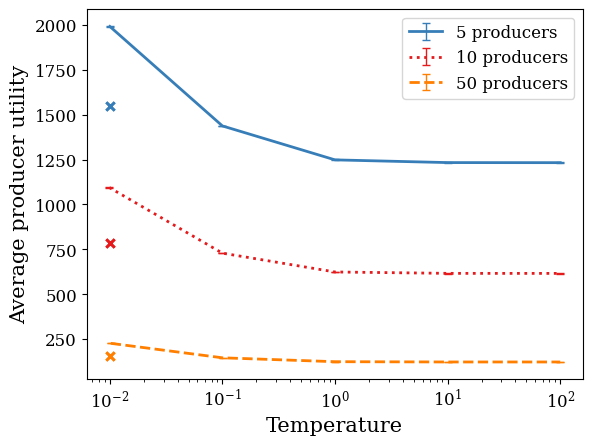

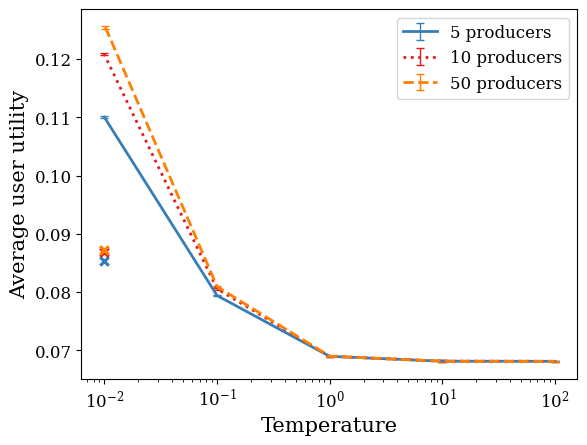

In [13]:
plot_utils_tempvar_prodcurves__errbar(dict_df, df_linear, nprodlist, '../plots/util-temps-nprodcurves/rentrunway_')

/Users/krishna/Documents/Research/StrategicML/RecSys/recsys-code/recsys_eq/notebooks/../source/plotting.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by = 'temp', inplace = True)


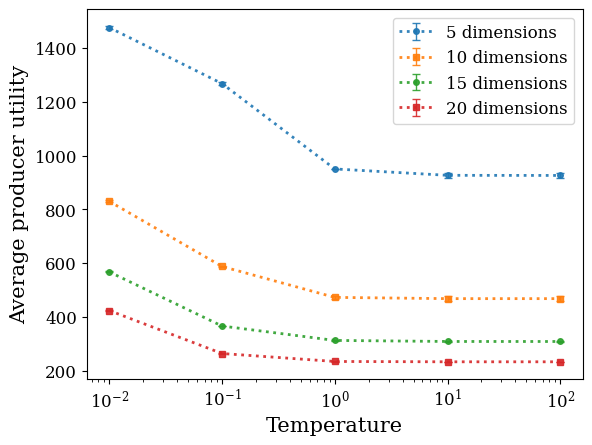

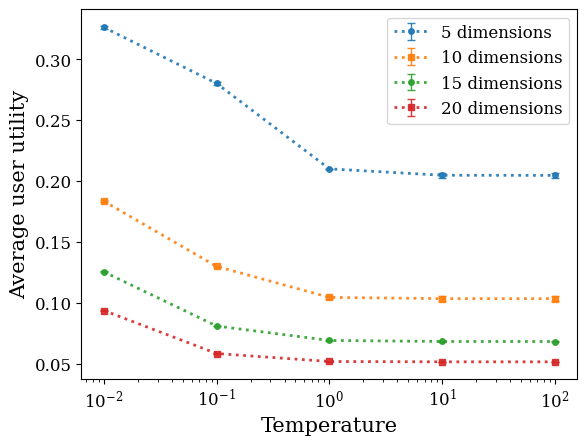

In [14]:
plot_utils_tempvar_dimcurves__errbar(dict_df, '../plots/util-temps-ndimcurves/rentrunway_')

## Movielens-100k

In [15]:
df_100 = pd.read_pickle("../saved_frames/movielens-100k_softmax_temp_100.0/concseeds5.pkl")
df_10 = pd.read_pickle("../saved_frames/movielens-100k_softmax_temp_10.0/concseeds5.pkl")
df_1 = pd.read_pickle("../saved_frames/movielens-100k_softmax_temp_1.0/concseeds5.pkl")
df_01 = pd.read_pickle("../saved_frames/movielens-100k_softmax_temp_0.1/concseeds5.pkl")
df_001 = pd.read_pickle("../saved_frames/movielens-100k_softmax_temp_0.01/concseeds5.pkl")
df_linear = pd.read_pickle("../saved_frames/movielens-100k_linear_temp_1.0/concseeds5.pkl")

(df_001['NE_exists'] == False).sum(), (df_01['NE_exists'] == False).sum(), \
(df_1['NE_exists']==False).sum(), (df_10['NE_exists']==False).sum(), \
(df_100['NE_exists']==False).sum(), (df_linear['NE_exists']==False).sum()

(7, 0, 0, 0, 0, 0)

In [16]:
dict_df = {}
dict_df[100] = df_100
dict_df[10] = df_10
dict_df[1] = df_1
dict_df[0.1] = df_01
dict_df[0.01] = df_001

/Users/krishna/Documents/Research/StrategicML/RecSys/recsys-code/recsys_eq/notebooks/../source/plotting.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by = 'temp', inplace = True)


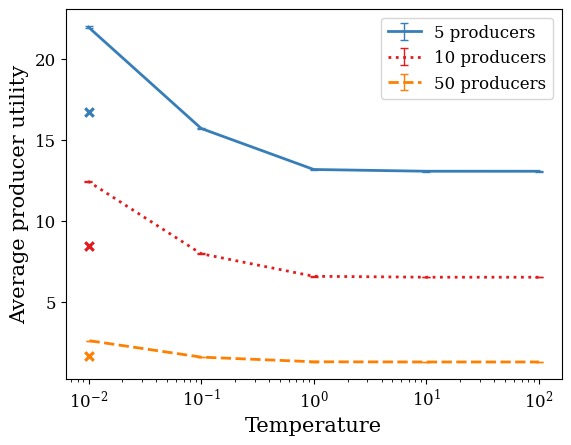

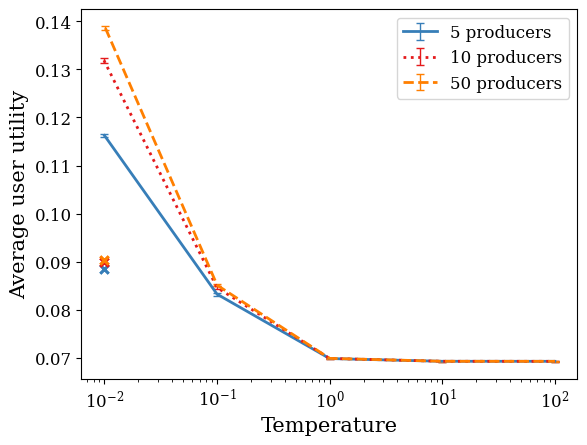

In [17]:
plot_utils_tempvar_prodcurves__errbar(dict_df, df_linear, nprodlist, '../plots/util-temps-nprodcurves/ml100k_')

/Users/krishna/Documents/Research/StrategicML/RecSys/recsys-code/recsys_eq/notebooks/../source/plotting.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by = 'temp', inplace = True)


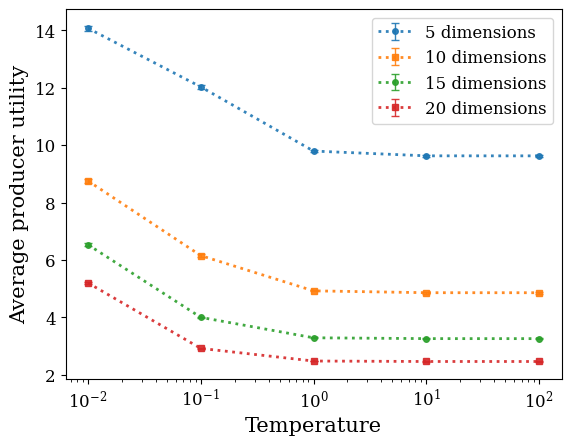

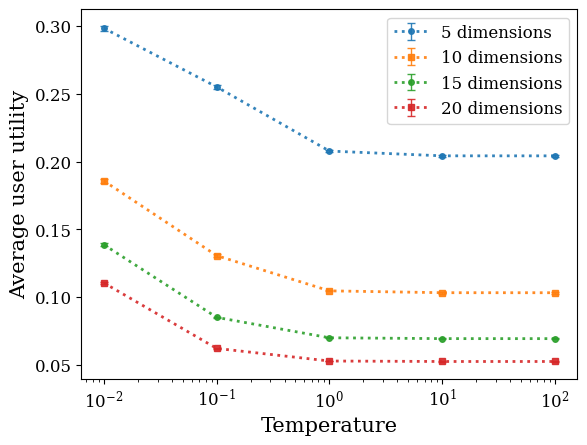

In [18]:
plot_utils_tempvar_dimcurves__errbar(dict_df, '../plots/util-temps-ndimcurves/ml100k_')

## Synth uniform

In [19]:
df_100 = pd.read_pickle("../saved_frames/synth-uniform_softmax_temp_100.0/concseeds5.pkl")
df_10 = pd.read_pickle("../saved_frames/synth-uniform_softmax_temp_10.0/concseeds5.pkl")
df_1 = pd.read_pickle("../saved_frames/synth-uniform_softmax_temp_1.0/concseeds5.pkl")
df_01 = pd.read_pickle("../saved_frames/synth-uniform_softmax_temp_0.1/concseeds5.pkl")
df_001 = pd.read_pickle("../saved_frames/synth-uniform_softmax_temp_0.01/concseeds5.pkl")
df_linear = pd.read_pickle("../saved_frames/synth-uniform_linear_temp_1.0/concseeds5.pkl")

(df_001['NE_exists'] == False).sum(), (df_01['NE_exists'] == False).sum(), \
(df_1['NE_exists']==False).sum(), (df_10['NE_exists']==False).sum(), \
(df_100['NE_exists']==False).sum(), (df_linear['NE_exists']==False).sum()

(8, 0, 0, 0, 0, 1)

In [20]:
dict_df = {}
dict_df[100] = df_100
dict_df[10] = df_10
dict_df[1] = df_1
dict_df[0.1] = df_01
dict_df[0.01] = df_001

/Users/krishna/Documents/Research/StrategicML/RecSys/recsys-code/recsys_eq/notebooks/../source/plotting.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by = 'temp', inplace = True)


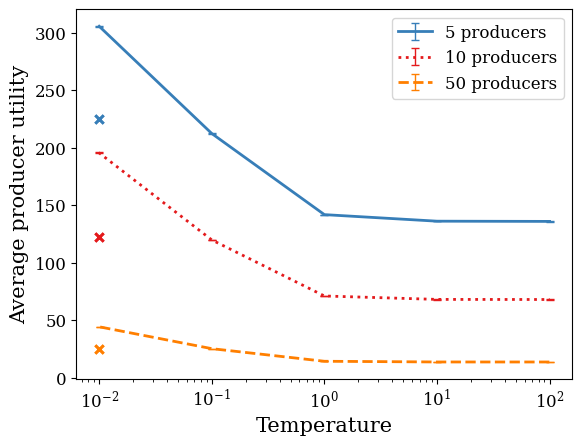

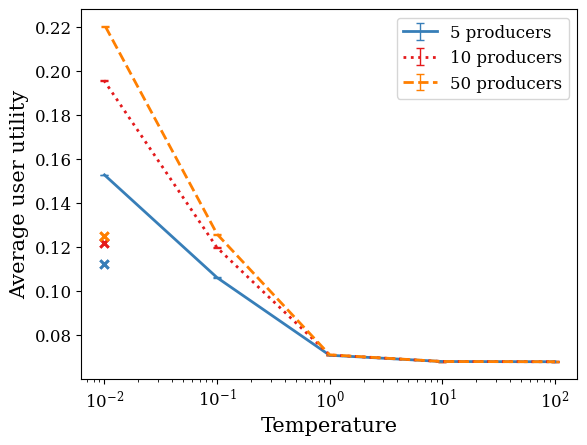

In [21]:
plot_utils_tempvar_prodcurves__errbar(dict_df, df_linear, nprodlist, '../plots/util-temps-nprodcurves/synthuniform_')

/Users/krishna/Documents/Research/StrategicML/RecSys/recsys-code/recsys_eq/notebooks/../source/plotting.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by = 'temp', inplace = True)


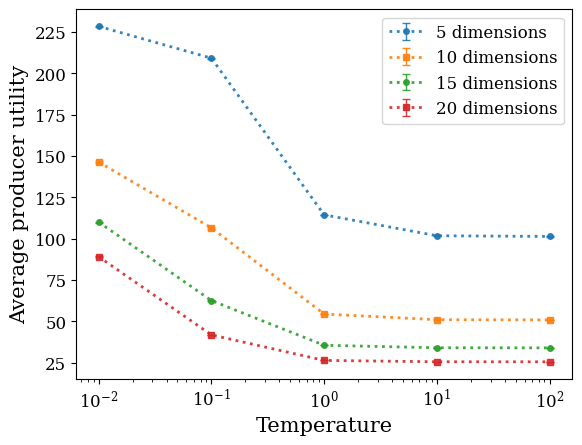

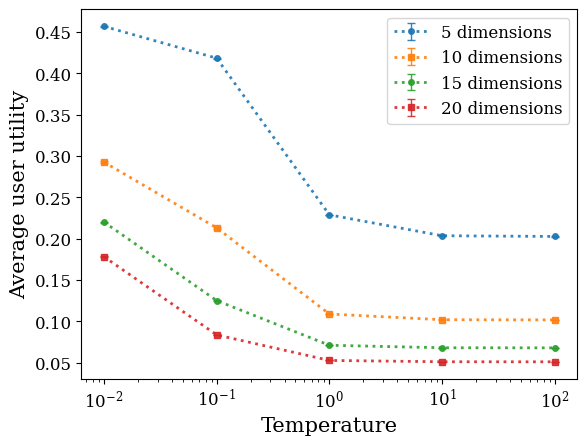

In [22]:
plot_utils_tempvar_dimcurves__errbar(dict_df, '../plots/util-temps-ndimcurves/synthuniform_')

## Synth skewed

In [23]:
df_100 = pd.read_pickle("../saved_frames/synth-skewed_softmax_temp_100.0/concseeds5.pkl")
df_10 = pd.read_pickle("../saved_frames/synth-skewed_softmax_temp_10.0/concseeds5.pkl")
df_1 = pd.read_pickle("../saved_frames/synth-skewed_softmax_temp_1.0/concseeds5.pkl")
df_01 = pd.read_pickle("../saved_frames/synth-skewed_softmax_temp_0.1/concseeds5.pkl")
df_001 = pd.read_pickle("../saved_frames/synth-skewed_softmax_temp_0.01/concseeds5.pkl")
df_linear = pd.read_pickle("../saved_frames/synth-skewed_linear_temp_1.0/concseeds5.pkl")

(df_001['NE_exists'] == False).sum(), (df_01['NE_exists'] == False).sum(), \
(df_1['NE_exists']==False).sum(), (df_10['NE_exists']==False).sum(), \
(df_100['NE_exists']==False).sum(), (df_linear['NE_exists']==False).sum()

(0, 0, 0, 0, 0, 0)

In [24]:
dict_df = {}
dict_df[100] = df_100
dict_df[10] = df_10
dict_df[1] = df_1
dict_df[0.1] = df_01
dict_df[0.01] = df_001

/Users/krishna/Documents/Research/StrategicML/RecSys/recsys-code/recsys_eq/notebooks/../source/plotting.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by = 'temp', inplace = True)


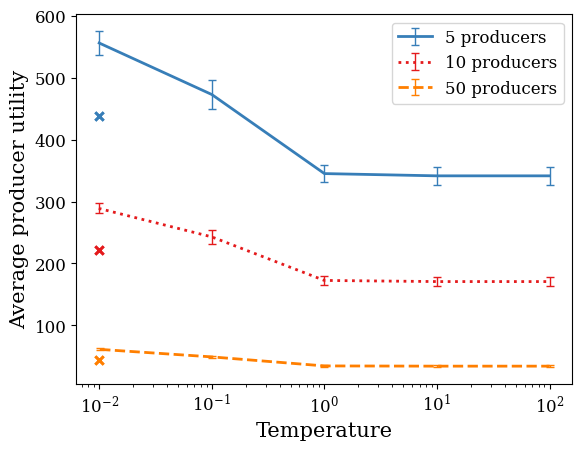

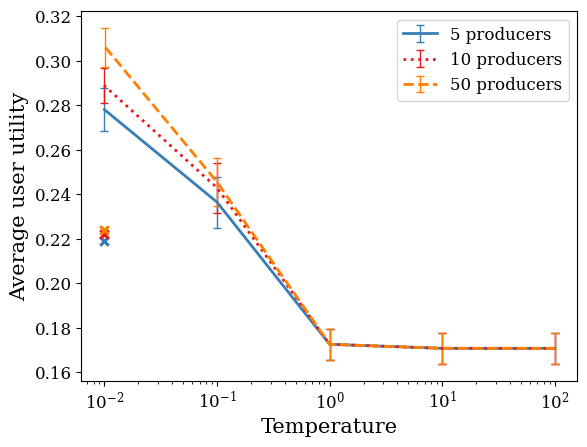

In [25]:
plot_utils_tempvar_prodcurves__errbar(dict_df, df_linear, nprodlist, '../plots/util-temps-nprodcurves/synthskewed_')

/Users/krishna/Documents/Research/StrategicML/RecSys/recsys-code/recsys_eq/notebooks/../source/plotting.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by = 'temp', inplace = True)


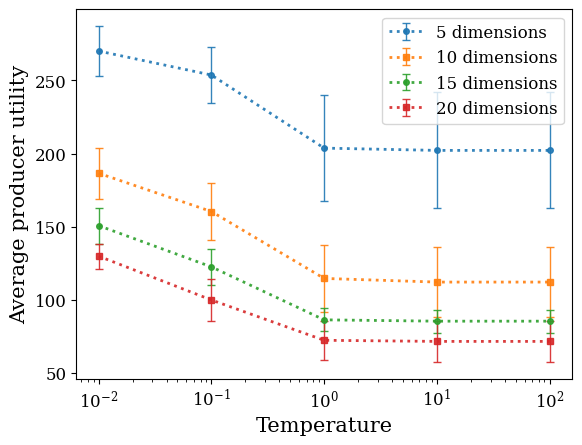

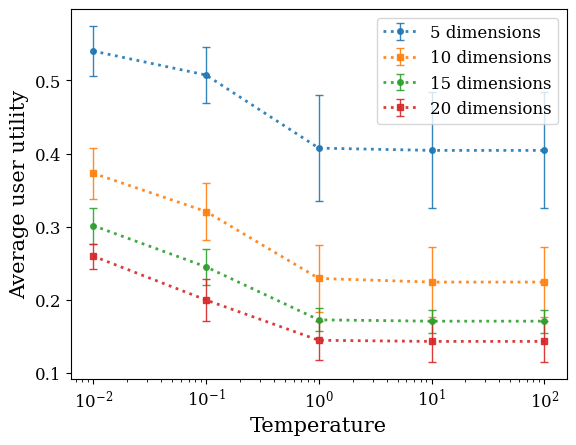

In [26]:
plot_utils_tempvar_dimcurves__errbar(dict_df, '../plots/util-temps-ndimcurves/synthskewed_')

/Users/krishna/Documents/Research/StrategicML/RecSys/recsys-code/recsys_eq/notebooks/../source/plotting.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by = 'temp', inplace = True)


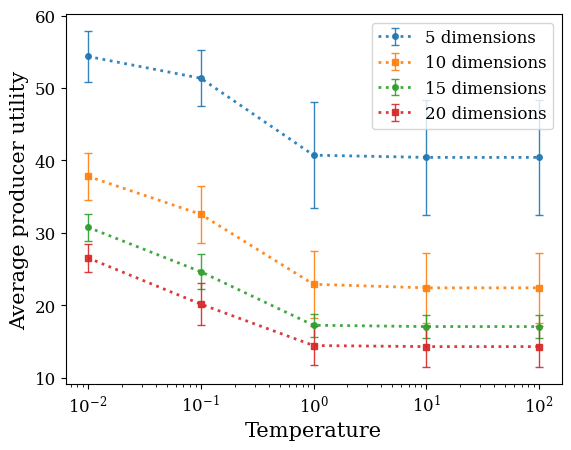

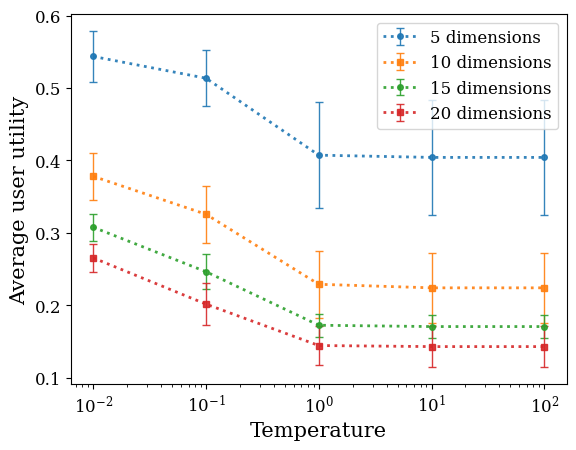

In [27]:
plot_utils_tempvar_dimcurves__errbar(dict_df, '../plots/util-temps-ndimcurves/synthskewed_100prod_', nprod=100)

In [28]:
df_100.dimension[0]

0    5
0    5
0    5
0    5
0    5
Name: dimension, dtype: int64

In [29]:
  def df_agg_utils(df, temp:int):
    '''
      average across seeds

      Returns 
      df_agg has columns: dimension, nprod, avg_prod_util_mean, avg_prod_util_std, avg_user_util_mean, avg_user_util_std
    '''
    groups = ['dimension', 'nprod'] # groupby columns, averages out across seeds
    cols = groups + ['avg_prod_util', 'avg_user_util']
    df = df[df['NE_exists'] == True][cols]
    df_agg = df.groupby(groups).agg([np.mean, np.std]) # iters_to_NE will get mean, std; we group by dimensions, num_prod
    df_agg.columns = df_agg.columns.map("_".join) # this is just to flatten multi column iters_to_NE mean and std
    df_agg.reset_index(inplace=True)
    df_agg['temp'] = temp # add a column for temperatur
    return df_agg

In [30]:
df_sm = pd.concat([df_agg_utils(df, temperature_key) for temperature_key, df in dict_df.items()]) # concatenate across tempeartures

In [31]:
df_sm.columns

Index(['dimension', 'nprod', 'avg_prod_util_mean', 'avg_prod_util_std',
       'avg_user_util_mean', 'avg_user_util_std', 'temp'],
      dtype='object')

In [32]:
df_100.columns

Index(['dimension', 'emb_seed', 'nprod', 'NE_exists', 'iters',
       'last_profile_compact', 'producer_dist', 'user_dist', 'total_prod_util',
       'avg_prod_util', 'max_prod_util', 'min_prod_util', 'total_user_util',
       'avg_user_util', 'max_user_util', 'min_user_util'],
      dtype='object')

In [33]:
df_100.emb_seed.unique()

array([13, 17, 23, 29, 19])

In [34]:
df_sm.shape, df_100.shape

((240, 7), (240, 16))

In [35]:
df = df_sm[(df_sm['dimension'] == 15)  & (df_sm['nprod'] == 100)]

In [36]:
df

,dimension,nprod,avg_prod_util_mean,avg_prod_util_std,avg_user_util_mean,avg_user_util_std,temp
35,15,100,17.073122,1.575332,0.170731,0.015753,100.00
35,15,100,17.073122,1.575332,0.170731,0.015753,10.00
35,15,100,17.254973,1.560187,0.172550,0.015602,1.00
35,15,100,24.643819,2.442788,0.246438,0.024428,0.10
35,15,100,30.779137,1.862088,0.307791,0.018621,0.01


In [37]:
df

,dimension,nprod,avg_prod_util_mean,avg_prod_util_std,avg_user_util_mean,avg_user_util_std,temp
35,15,100,17.073122,1.575332,0.170731,0.015753,100.00
35,15,100,17.073122,1.575332,0.170731,0.015753,10.00
35,15,100,17.254973,1.560187,0.172550,0.015602,1.00
35,15,100,24.643819,2.442788,0.246438,0.024428,0.10
35,15,100,30.779137,1.862088,0.307791,0.018621,0.01


In [38]:
df.sort_values(by = 'temp', inplace = True)


/var/folders/t1/gd3l0zxn0hzdg0bsmr1jpsfw0000gn/T/ipykernel_73781/3607077331.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by = 'temp', inplace = True)


In [39]:
df

,dimension,nprod,avg_prod_util_mean,avg_prod_util_std,avg_user_util_mean,avg_user_util_std,temp
35,15,100,30.779137,1.862088,0.307791,0.018621,0.01
35,15,100,24.643819,2.442788,0.246438,0.024428,0.10
35,15,100,17.254973,1.560187,0.172550,0.015602,1.00
35,15,100,17.073122,1.575332,0.170731,0.015753,10.00
35,15,100,17.073122,1.575332,0.170731,0.015753,100.00
